In [1]:
import pandas as pd
from rdkit import Chem
import tmap as tm
from map4 import MAP4Calculator

# Rdkit import for molecular features
# ==============================================================================
import rdkit
import rdkit.Chem
import rdkit.Chem.Fragments
import rdkit.Chem.Descriptors

import rdkit.Chem.rdchem
from rdkit.Chem import AllChem, Draw

from rdkit.Chem import MACCSkeys
import awkward as ak
from itertools import combinations

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
dim =  2048

MAP4 = MAP4Calculator(dimensions = dim)

In [5]:
ENC = tm.Minhash(dim)

In [6]:
foodb = pd.read_csv('foodb_curated.csv')
unpda = pd.read_csv('unpda_curated.csv')
fda = pd.read_csv('fda_curated.csv')
purch = pd.read_csv('purch_curated.csv')

In [7]:
foodb = foodb[['PUBLIC_ID', 'SMILES_chiral']]
unpda = unpda[['ID', 'SMILES_chiral']]
fda = fda[['ID', 'SMILES_chiral']]
purch = purch[['PUBLIC_ID', 'SMILES_chiral']]

In [8]:
foodb.columns = ['ID', 'SMILES_chiral']
purch.columns = ['ID', 'SMILES_chiral']

In [9]:
print(f'initial shape: {foodb.shape}')
foodb_1 = foodb.sample(n = 1000, random_state = 15)
foodb_1.reset_index(drop = True, inplace = True)
foodb = foodb.drop(foodb_1.index)
foodb.reset_index(drop = True, inplace = True)
print(f'first sample: {foodb.shape}')
foodb_2 = foodb.sample(n = 1000, random_state = 15)
foodb_2.reset_index(drop = True, inplace = True)
foodb = foodb.drop(foodb_2.index)
foodb.reset_index(drop = True, inplace = True)
print(f'second sample: {foodb.shape}')
foodb_3 = foodb.sample(n = 1000, random_state = 15)
foodb_3.reset_index(drop = True, inplace = True)
foodb = foodb.drop(foodb_3.index)
foodb.reset_index(drop = True, inplace = True)
print(f'third sample: {foodb.shape}')
foodb_4 = foodb.sample(n = 1000, random_state = 15)
foodb_4.reset_index(drop = True, inplace = True)
foodb = foodb.drop(foodb_4.index)
foodb.reset_index(drop = True, inplace = True)
print(f'fourth sample: {foodb.shape}')
foodb_5 = foodb.sample(n = 1000, random_state = 15)
foodb_5.reset_index(drop = True, inplace = True)
foodb = foodb.drop(foodb_5.index)
foodb.reset_index(drop = True, inplace = True)
print(f'fifth sample: {foodb.shape}')

initial shape: (68658, 2)
first sample: (67658, 2)
second sample: (66658, 2)
third sample: (65658, 2)
fourth sample: (64658, 2)
fifth sample: (63658, 2)


In [10]:
foodb = pd.concat([foodb_1, foodb_2, foodb_3, foodb_4, foodb_5], ignore_index = True)

In [11]:
print(foodb.shape)
foodb.tail(2)

(5000, 2)


,ID,SMILES_chiral
4998,FDB098333,CCCCCC/C=C\CCCCCCCC(=O)OC[C@H](COC(=O)CCCCCCCC...
4999,FDB065492,CC(C)CCCCCCCCCCCCCCC(=O)OC[C@H](O)COC(=O)CCCCC...


In [12]:
foodb_map4 = [MAP4.calculate(rdkit.Chem.MolFromSmiles(x)) for x in foodb['SMILES_chiral']]
unpda_map4 = [MAP4.calculate(rdkit.Chem.MolFromSmiles(x)) for x in unpda['SMILES_chiral']]
fda_map4 = [MAP4.calculate(rdkit.Chem.MolFromSmiles(x)) for x in fda['SMILES_chiral']]
purch_map4 = [MAP4.calculate(rdkit.Chem.MolFromSmiles(x)) for x in purch['SMILES_chiral']]


In [13]:
foodb_map4_combination = list(combinations(foodb_map4, 2))
unpda_map4_combination = list(combinations(unpda_map4, 2))
fda_map4_combination = list(combinations(fda_map4, 2))
purch_map4_combination = list(combinations(purch_map4, 2))


In [71]:
foodb_map4_similarity = np.sort([1 - ENC.get_distance(y[0], y[1]) for y in foodb_map4_combination])
unpda_map4_similarity = np.sort([1 - ENC.get_distance(y[0], y[1]) for y in unpda_map4_combination])
fda_map4_similarity = np.sort([1 - ENC.get_distance(y[0], y[1]) for y in fda_map4_combination])
purch_map4_similarity = np.sort([1 - ENC.get_distance(y[0], y[1]) for y in purch_map4_combination])


In [72]:
prop_map4_foodb = 1. * np.arange(len(foodb_map4_similarity)) / (len(foodb_map4_similarity) - 1)
prop_map4_unpda = 1. * np.arange(len(unpda_map4_similarity)) / (len(unpda_map4_similarity) - 1)
prop_map4_fda = 1. * np.arange(len(fda_map4_similarity)) / (len(fda_map4_similarity) - 1)
prop_map4_purch = 1. * np.arange(len(purch_map4_similarity)) / (len(purch_map4_similarity) - 1)


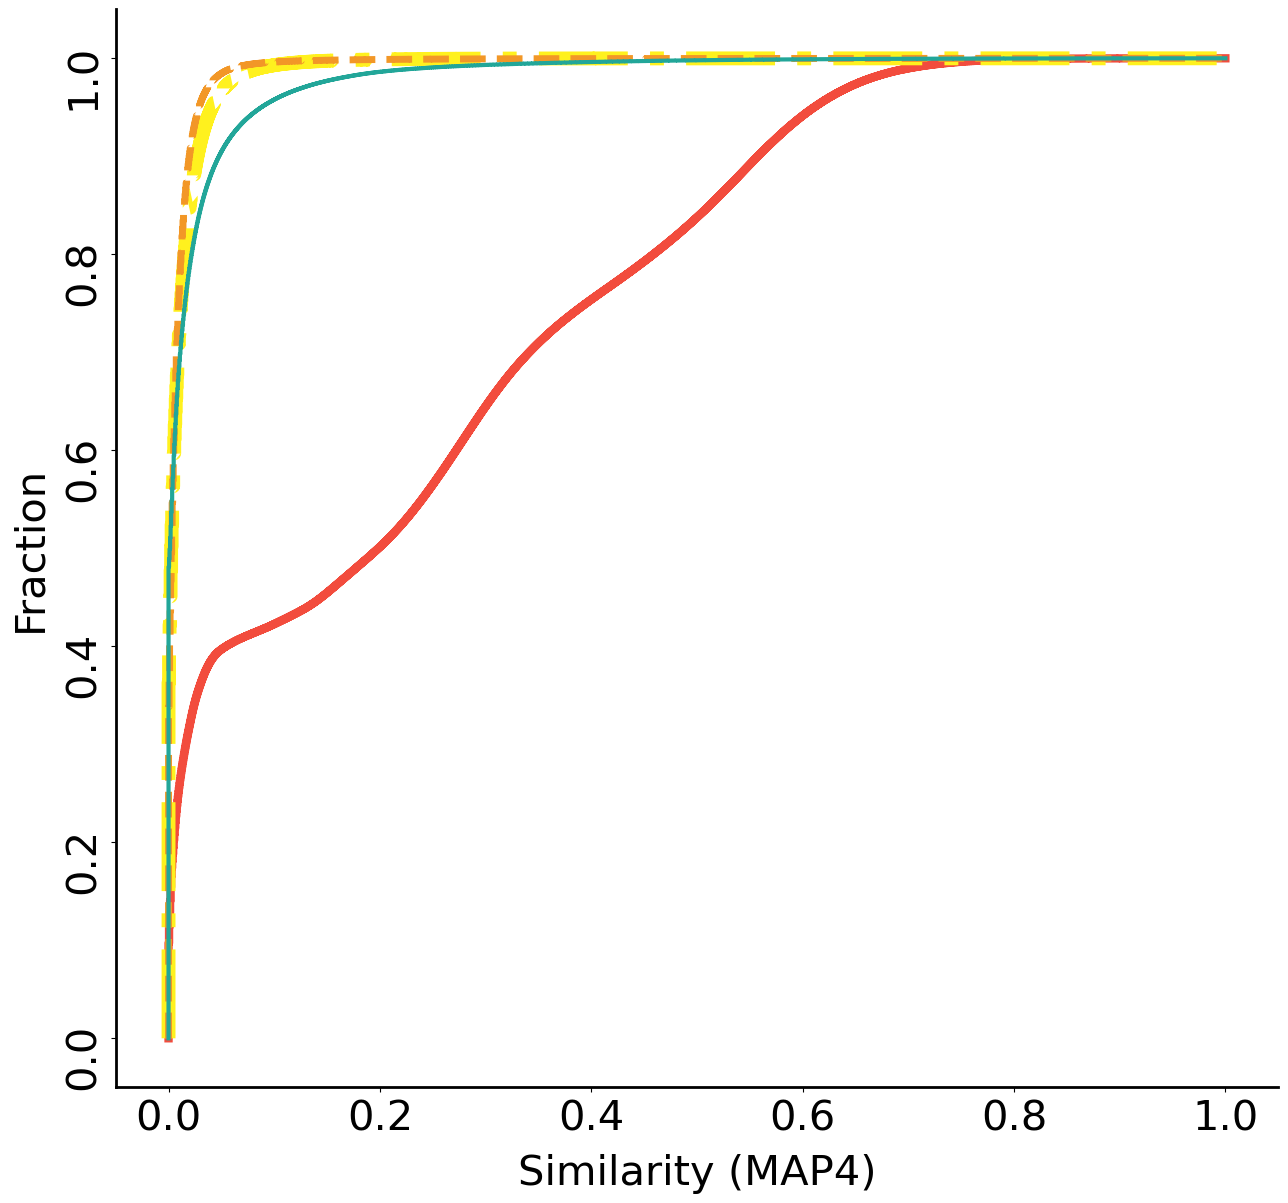

In [99]:
# Figure 4 - MAP4
plt.figure(figsize=(15, 14))
plt.plot(foodb_map4_similarity, prop_map4_foodb, label="FooDB", c="#F24C3D", lw = 6, linestyle = '-') # red F24C3D
plt.plot(unpda_map4_similarity, prop_map4_unpda, label="UNPD-A", c="#FFF11E", lw = 10, linestyle = '-.') # yellow FFF11E
plt.plot(fda_map4_similarity, prop_map4_fda, label="FDA", c="#F29727", lw = 5, linestyle = '--') # orange F29727
plt.plot(purch_map4_similarity, prop_map4_purch, label="FooDB commercially available", c="#22A699", lw = 3, linestyle = '-') # green 22A699

plt.xlabel('Similarity (MAP4)', fontsize=30, labelpad = 10)
plt.ylabel('Fraction', fontsize=30, labelpad = 10)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(2.0)

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(2.0)

ax.tick_params(axis='both', which='major', pad=5)

plt.xticks(rotation=0, fontsize=30)
plt.yticks(rotation=90, fontsize=30)

# ax1.legend(loc='lower center', ncol=2, fancybox=True, shadow=True)
plt.savefig("similarity_map4.png", bbox_inches='tight', dpi=300)
plt.show()

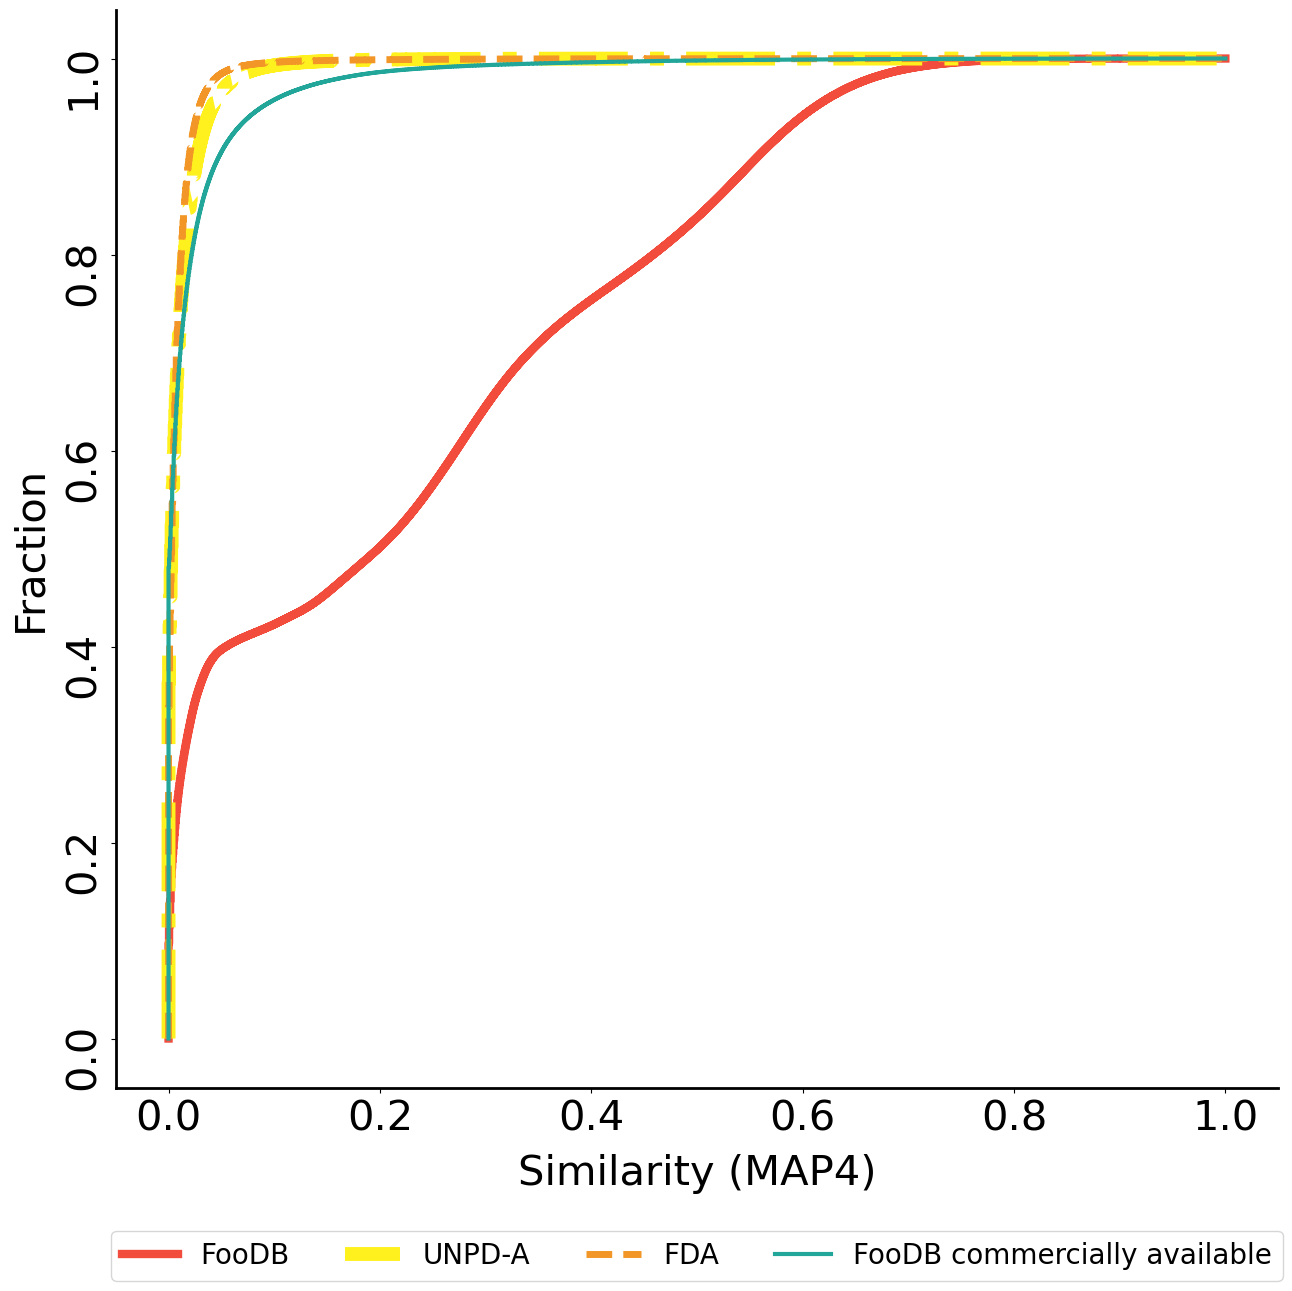

In [102]:
# Figure 4 - MAP4
plt.figure(figsize=(15, 14))
plt.plot(foodb_map4_similarity, prop_map4_foodb, label="FooDB", c="#F24C3D", lw = 6, linestyle = '-') # red F24C3D
plt.plot(unpda_map4_similarity, prop_map4_unpda, label="UNPD-A", c="#FFF11E", lw = 10, linestyle = '-.') # yellow FFF11E
plt.plot(fda_map4_similarity, prop_map4_fda, label="FDA", c="#F29727", lw = 5, linestyle = '--') # orange F29727
plt.plot(purch_map4_similarity, prop_map4_purch, label="FooDB commercially available", c="#22A699", lw = 3, linestyle = '-') # green 22A699

plt.xlabel('Similarity (MAP4)', fontsize=30, labelpad = 10)
plt.ylabel('Fraction', fontsize=30, labelpad = 10)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(2.0)

ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_linewidth(2.0)

ax.tick_params(axis='both', which='major', pad=5)

plt.xticks(rotation=0, fontsize=30)
plt.yticks(rotation=90, fontsize=30)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol = 4, fontsize=20)
plt.savefig("similarity_map4_legend.png", bbox_inches='tight', dpi=300)
plt.show()

In [74]:
# MAP4 statistics
map4_foodb = pd.DataFrame(foodb_map4_similarity, columns = ['MAP4_foodb'])
map4_foodb = map4_foodb.describe()

map4_unpda = pd.DataFrame(unpda_map4_similarity, columns = ['MAP4_unpda'])
map4_unpda = map4_unpda.describe()

map4_fda = pd.DataFrame(fda_map4_similarity, columns = ['MAP4_fda'])
map4_fda = map4_fda.describe()

map4_purch = pd.DataFrame(purch_map4_similarity, columns = ['MAP4_purch'])
map4_purch = map4_purch.describe()


In [75]:
data = pd.concat([map4_foodb, map4_unpda, map4_fda, map4_purch],
                 axis = 1)

In [76]:
data = data.round(3)
data

,MAP4_foodb,MAP4_unpda,MAP4_fda,MAP4_purch
count,1.249750e+07,1.124025e+08,2699326.000,5542785.000
mean,2.250000e-01,1.000000e-02,0.008,0.019
std,2.190000e-01,2.000000e-02,0.019,0.051
min,0.000000e+00,0.000000e+00,0.000,0.000
25%,9.000000e-03,0.000000e+00,0.000,0.000
50%,1.990000e-01,2.000000e-03,0.003,0.001
75%,3.950000e-01,1.200000e-02,0.010,0.016
max,1.000000e+00,1.000000e+00,1.000,1.000


In [77]:
data.to_csv("similarity_map4.csv", index=True)

In [78]:
statistics = pd.read_csv("similarity_map4.csv")
statistics

,Unnamed: 0,MAP4_foodb,MAP4_unpda,MAP4_fda,MAP4_purch
0,count,1.249750e+07,1.124025e+08,2699326.000,5542785.000
1,mean,2.250000e-01,1.000000e-02,0.008,0.019
2,std,2.190000e-01,2.000000e-02,0.019,0.051
3,min,0.000000e+00,0.000000e+00,0.000,0.000
4,25%,9.000000e-03,0.000000e+00,0.000,0.000
5,50%,1.990000e-01,2.000000e-03,0.003,0.001
6,75%,3.950000e-01,1.200000e-02,0.010,0.016
7,max,1.000000e+00,1.000000e+00,1.000,1.000


In [79]:
statistics.columns

Index(['Unnamed: 0', 'MAP4_foodb', 'MAP4_unpda', 'MAP4_fda', 'MAP4_purch'], dtype='object')

In [80]:
statistics.columns = ['statistics', 'MAP4_foodb', 'MAP4_unpda',
                      'MAP4_fda', 'MAP4_purch']


In [81]:
statistics

,statistics,MAP4_foodb,MAP4_unpda,MAP4_fda,MAP4_purch
0,count,1.249750e+07,1.124025e+08,2699326.000,5542785.000
1,mean,2.250000e-01,1.000000e-02,0.008,0.019
2,std,2.190000e-01,2.000000e-02,0.019,0.051
3,min,0.000000e+00,0.000000e+00,0.000,0.000
4,25%,9.000000e-03,0.000000e+00,0.000,0.000
5,50%,1.990000e-01,2.000000e-03,0.003,0.001
6,75%,3.950000e-01,1.200000e-02,0.010,0.016
7,max,1.000000e+00,1.000000e+00,1.000,1.000


In [82]:
stat = list(statistics["statistics"])

In [83]:
array = statistics.to_numpy()
print(array)


[['count' 12497500.0 112402521.0 2699326.0 5542785.0]
 ['mean' 0.225 0.01 0.008 0.019]
 ['std' 0.219 0.02 0.019 0.051]
 ['min' 0.0 0.0 0.0 0.0]
 ['25%' 0.009 0.0 0.0 0.0]
 ['50%' 0.199 0.002 0.003 0.001]
 ['75%' 0.395 0.012 0.01 0.016]
 ['max' 1.0 1.0 1.0 1.0]]


In [84]:
array = np.transpose(array)
print(array)

[['count' 'mean' 'std' 'min' '25%' '50%' '75%' 'max']
 [12497500.0 0.225 0.219 0.0 0.009 0.199 0.395 1.0]
 [112402521.0 0.01 0.02 0.0 0.0 0.002 0.012 1.0]
 [2699326.0 0.008 0.019 0.0 0.0 0.003 0.01 1.0]
 [5542785.0 0.019 0.051 0.0 0.0 0.001 0.016 1.0]]


In [85]:
df = pd.DataFrame(array, columns=stat)
df

,count,mean,std,min,25%,50%,75%,max
0,count,mean,std,min,25%,50%,75%,max
1,12497500.0,0.225,0.219,0.0,0.009,0.199,0.395,1.0
2,112402521.0,0.01,0.02,0.0,0.0,0.002,0.012,1.0
3,2699326.0,0.008,0.019,0.0,0.0,0.003,0.01,1.0
4,5542785.0,0.019,0.051,0.0,0.0,0.001,0.016,1.0


In [86]:
df2 = df.iloc[1:]
df2 = df2.reset_index(drop=True)
df2

,count,mean,std,min,25%,50%,75%,max
0,12497500.0,0.225,0.219,0.0,0.009,0.199,0.395,1.0
1,112402521.0,0.01,0.02,0.0,0.0,0.002,0.012,1.0
2,2699326.0,0.008,0.019,0.0,0.0,0.003,0.01,1.0
3,5542785.0,0.019,0.051,0.0,0.0,0.001,0.016,1.0


In [87]:
df2["data_set"] = ['MAP4_foodb', 'MAP4_unpda', 'MAP4_fda',
                   'MAP4_purch']

In [88]:
df2 = df2[['data_set','count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
df2


,data_set,count,mean,std,min,25%,50%,75%,max
0,MAP4_foodb,12497500.0,0.225,0.219,0.0,0.009,0.199,0.395,1.0
1,MAP4_unpda,112402521.0,0.01,0.02,0.0,0.0,0.002,0.012,1.0
2,MAP4_fda,2699326.0,0.008,0.019,0.0,0.0,0.003,0.01,1.0
3,MAP4_purch,5542785.0,0.019,0.051,0.0,0.0,0.001,0.016,1.0


In [89]:
df2.to_csv("similarity_map4_clean.csv", index=False)


In [90]:
maccs_ecfp = pd.read_csv("similarity_maccs_ecfp_clean.csv")
map4 = pd.read_csv("similarity_map4_clean.csv")


In [91]:
map4

,data_set,count,mean,std,min,25%,50%,75%,max
0,MAP4_foodb,12497500.0,0.225,0.219,0.0,0.009,0.199,0.395,1.0
1,MAP4_unpda,112402521.0,0.010,0.020,0.0,0.000,0.002,0.012,1.0
2,MAP4_fda,2699326.0,0.008,0.019,0.0,0.000,0.003,0.010,1.0
3,MAP4_purch,5542785.0,0.019,0.051,0.0,0.000,0.001,0.016,1.0


In [92]:
maccs_ecfp = maccs_ecfp[['data_set', 'count', 'mean', 'std', 'min', '25%', '50%',
       '75%', 'max']]
maccs_ecfp

,data_set,count,mean,std,min,25%,50%,75%,max
0,MACCS_foodb,12497500.0,0.645,0.306,0.0,0.354,0.619,0.933,1.0
1,MACCS_unpda,112402521.0,0.350,0.172,0.0,0.222,0.341,0.464,1.0
2,MACCS_fda,2699326.0,0.300,0.144,0.0,0.200,0.295,0.395,1.0
3,MACCS_purch,5542785.0,0.256,0.172,0.0,0.132,0.222,0.343,1.0
4,ECFP4_foodb,12497500.0,0.437,0.320,0.0,0.100,0.474,0.692,1.0
5,ECFP4_unpda,112402521.0,0.098,0.057,0.0,0.060,0.091,0.127,1.0
6,ECFP4_fda,2699326.0,0.096,0.051,0.0,0.065,0.094,0.124,1.0
7,ECFP4_purch,5542785.0,0.115,0.101,0.0,0.054,0.091,0.143,1.0
8,ECFP6_foodb,12497500.0,0.403,0.313,0.0,0.084,0.418,0.640,1.0
9,ECFP6_unpda,112402521.0,0.081,0.043,0.0,0.053,0.077,0.104,1.0


In [93]:
Similarity_statistics = pd.concat([maccs_ecfp, map4], ignore_index = True)


In [94]:
Similarity_statistics.to_csv('similarity_statistics.csv', index = False)


In [95]:
Similarity_statistics

,data_set,count,mean,std,min,25%,50%,75%,max
0,MACCS_foodb,12497500.0,0.645,0.306,0.0,0.354,0.619,0.933,1.0
1,MACCS_unpda,112402521.0,0.350,0.172,0.0,0.222,0.341,0.464,1.0
2,MACCS_fda,2699326.0,0.300,0.144,0.0,0.200,0.295,0.395,1.0
3,MACCS_purch,5542785.0,0.256,0.172,0.0,0.132,0.222,0.343,1.0
4,ECFP4_foodb,12497500.0,0.437,0.320,0.0,0.100,0.474,0.692,1.0
5,ECFP4_unpda,112402521.0,0.098,0.057,0.0,0.060,0.091,0.127,1.0
6,ECFP4_fda,2699326.0,0.096,0.051,0.0,0.065,0.094,0.124,1.0
7,ECFP4_purch,5542785.0,0.115,0.101,0.0,0.054,0.091,0.143,1.0
8,ECFP6_foodb,12497500.0,0.403,0.313,0.0,0.084,0.418,0.640,1.0
9,ECFP6_unpda,112402521.0,0.081,0.043,0.0,0.053,0.077,0.104,1.0
